[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/allegheny-college-cmpsc-105-spring-2025/site/blob/main/code/voice_storytelling_activity.ipynb)

## Overlapping Audio Features Determine Emotion and Gender Classification in Speech

Emily Graber

## Abstract

Cochlear implant users often have difficulty
distinguishing the gender and emotion of the person they are talking to on the
phone when no visual cues are present. They feel a lack of control that builds
over time. Doctors and cochlear implant manufacturers would like to find a
solution to assist their patients' and customers. Part of the trouble is that
the microchips that do processing on the implants are only able to process
very basic features of the audio, however the features that enocode emotion
and gender cues may not be basic features. Here we will try to understand
what might be going wrong on the audio chips. In a first step, we will take
a computational approach to analyzing several audio files that contain sentences expressed with happiness and sadness by male and female speakers. The most salient pitch and amplitude were extracted from each file. Using only these two features to classify four categories of happy female, happy male, sad female, and sad male, the sentences are not correctly classified. This suggests that more than pitch and amplitude may be need to be processed in order to accurately classifying gender and emotion. Further development of audio processing algorithms that can capture more than pitch and amplitude would likely be helpful to untangle the differences in vocal samples and aid cochlear implant users.

## Hypothesis

- Basic audio features of pitch and amplitude are not sufficient to accurately classify audio samples

## Methods

### Data

Audio samples containing happy and sad speech from male and female speakers were downloaded from the Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS). The database overall contains 7356 files of 24 professional actors (12 female, 12 male), speaking two sentences with a number of different emotions and intensities. Only the happy and sad data from the actors were analyzed. These emotions were selected because they are typically easy to identity for normal-hearing subjects without using any visual cues. For cochlear implant users, identification based on audio alone is much more challenging.

### Preprocessing Steps

The wave files from the dataset were downloaded and audio transformations were applied to extract the most salient amplitude and pitch from each file. One audio file is shown below along with transformations that facilitated the pitch and amplitude extraction process.

The most salient amplitude was read off of the raw audio waveform (Figure 1) while the most salient pitch was read off of a truncated spectral representation of the audio (Figure 3).

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

import soundfile
from IPython.display import Audio, display

In [2]:
# general setting for numpy

np.seterr(divide = 'ignore'); # 'warn'

In [3]:
# TODO: specify the file to explore
# set 01.wav at the end, or 02.wav, 03.wav etc

! wget https://github.com/allegheny-college-cmpsc-105-spring-2025/site/raw/refs/heads/main/data/data-RAVDESS-audio/03.wav &> /dev/null
! wget https://github.com/allegheny-college-cmpsc-105-spring-2025/site/raw/refs/heads/main/data/data-RAVDESS-audio/04.wav &> /dev/null

In [5]:
# Read in the data and apply transformations!

# TODO: set the filename
filename = '/content/03.wav'

y, fs = soundfile.read(filename)

In [6]:
print("File 03.wav")
Audio(y,rate=fs)

File 03.wav


In [10]:
# run some transformations with scipy and logarithmic scaling to get a better view
# of the audio

t = np.arange(len(y))/fs
F, T, Y = scipy.signal.stft(y, fs, nperseg=2048,  padded=True, noverlap=1024)
Y_dB = 20*np.log10(np.abs(Y)/np.amax(np.amax(np.abs(Y))));

In [16]:
# Controls for Visualizations

# TODO: change these as needed to explore the data up close or zoomed out
time_limit = (0, 4) # bounds on time range in seconds

# TODO: change these as needed to explore the data up close or zoomed out
amplitude_limit = (-0.8, 0.8) # bounds on audio sample height

# TODO: change these as needed to explore your data up close or zoomed out
freq_limit = (0, 5000) # bounds on pitch range in Hz

# TODO: update loudness threshold as needed for exploration
loudness_threshold = -20

# # Summary
# print("Summary for: ", filename)
# print("----------------------")
# print("time limit is ", time_limit)
# print("amplitude limit is ", amplitude_limit)
# print("frequency limit is ", freq_limit)
# print("loudness threshold is ", loudness_threshold)


In [22]:
# Plotting

plt.close('all')

plt.figure(figsize=(10,4*3))

# Top Plot
plt.subplot(3,1,1)
plt.plot(t, y) # layer one, line plot
plt.grid()
plt.plot(t[np.argmin(y)], y[np.argmin(y)], 'r*');
plt.annotate(f"({t[np.argmin(y)]},{y[np.argmin(y)]})", (t[np.argmin(y)], y[np.argmin(y)]))
plt.plot(t[np.argmax(y)], y[np.argmax(y)], 'r*');
plt.annotate(f"({t[np.argmax(y)]},{y[np.argmax(y)]})", (t[np.argmax(y)], y[np.argmax(y)]))
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title(f"FIGURE 1. Waveform of {filename}")
plt.xlim(time_limit)
plt.ylim(amplitude_limit)
plt.plot(t, np.sqrt(np.convolve(np.power(y,2), 0.001*np.ones(1000), mode="same")))

# 2nd Plot
plt.subplot(3,1,2)
plt.imshow(Y_dB,
           origin='lower',
           vmin = -60, vmax = 0,
           aspect='auto',
           cmap='jet',
           interpolation='spline16',
           extent=[T[0], T[-1], F[0], F[-1]])
cbar = plt.colorbar(location="right")
cbar.ax.set_ylabel('<----softer..Loudness (dB)..louder---->', labelpad=-50)
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.title(f"FIGURE 2. Pitches Contained in Utterance {filename}")
plt.xlim(time_limit)
plt.ylim(freq_limit)

# 3rd Plot
spectrum_full = np.sum(Y_dB, axis=1)

# 4th Plot
Y_dB_loud = Y_dB >= loudness_threshold

# Bottom Plot
spectrum = np.sum(Y_dB_loud, axis=1)
plt.subplot(3,1,3)
plt.plot(F, spectrum)
plt.plot(F[np.argmax(spectrum)], spectrum[np.argmax(spectrum)], 'r*');
plt.annotate(f"({F[np.argmax(spectrum)]},{spectrum[np.argmax(spectrum)]})", (F[np.argmax(spectrum)], spectrum[np.argmax(spectrum)]))
plt.title(f"FIGURE 3. Cumulative Loudnesses Above Threshold of {loudness_threshold}")
plt.xlabel("Frequency (Hz)")
plt.xlim(freq_limit)
plt.ylabel("Sum over Loud Data Points (A.U.)")


plt.tight_layout()

# reaveal everything
plt.show()


The extracted pitch and amplitude data were stored in a new dataset. The original speaker gender and emotion were also recorded ito the new dataset. The new data set was then further processed.

In [23]:
# The figures above have some salient peaks that are significant for understanding
# what might be going on with audio pitch processing in cochlear implants

# Below are some variables containing observations coming from the audio graphs
# The filenum is the filename number
# max_abs_amplitude is the peak in the first figure
# most_common_freq is the peak in the third figure
# vocal_gender is based on your judgment from listening without using cochlear implants
# vocal_emotion is happy or sad, based on your judgement from listening without using cochlear implants

# TODO: run the code above and record the data points for all 24 files!

filenum = [1,2,3,4,5,8,9,15,16,17,18,19,20,21,22,23]
max_abs_amplitude = [.127,.2402,.596,.262,.155,.6,.2,.1,.19,.324,.042,.025,.143,.16,.068,.057]
most_common_freq = [128,257,281,281,234,281,468,234,234,140,656,164,563,257,210,164,]
vocal_gender = [0,1,0,1,0,1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]
vocal_emotion = [1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]


In [24]:
# Assuming all the variables are filled out, reformat the data...

data = {'filenum': filenum,
        'max_abs_amplitude': max_abs_amplitude,
        'most_common_freq': most_common_freq,
        'vocal_gender': vocal_gender,
        'vocal_emotion': vocal_emotion
        }

# TODO: pass data into a dataframe
df = pd.DataFrame(data)
# TODO: print the df
print(df)

    filenum  max_abs_amplitude  most_common_freq  vocal_gender  vocal_emotion
0         1             0.1270               128             0              1
1         2             0.2402               257             1              1
2         3             0.5960               281             0              1
3         4             0.2620               281             1              1
4         5             0.1550               234             0              1
5         8             0.6000               281             1              1
6         9             0.2000               468             0              1
7        15             0.1000               234             0              0
8        16             0.1900               234             1              0
9        17             0.3240               140             0              0
10       18             0.0420               656             1              0
11       19             0.0250               164             0  

In [ ]:
# TODO: Check the dimensions of the df


### Processing Steps

- TODO: describe major steps that you do to make sense of the data. Be specific enough so that
  someone could replicate your work in a different programming language. This means that you
  should not dictate what functions to use, rather the concepts to use.
- Ideally this will be a story with multiple steps, e.g. raw data inspection, then filtering, then averaging, then comparing
- Optional: Don't forget about the possibility of doing correlation, linear regression, k-means clustering, or hypothesis testing

### Purpose

- TODO: Explain why doing the steps above will answer your question


## Results and Discussion

- TODO: visualize as many of the previously-mentioned steps as possible. Label everything.
  Break up this markdown cell as needed with code cells that generate plots. Use
  python to generate plots
- TODO: state the mean and standard deviation in text for each major step that you take. Use
  python to compute those statistics
- TODO: for each plot, either right before or right after, describe the plot without interpretation.
  Just describe what you see, any relevant colors or categories, etc.
- TODO: after you describe the plot, interpret it. What does it mean and how does it connect
  back to your question?
- TODO: before going to the next step, say why you are going to the next step, and how it
  connects back to your question or logically follows from the previous step.

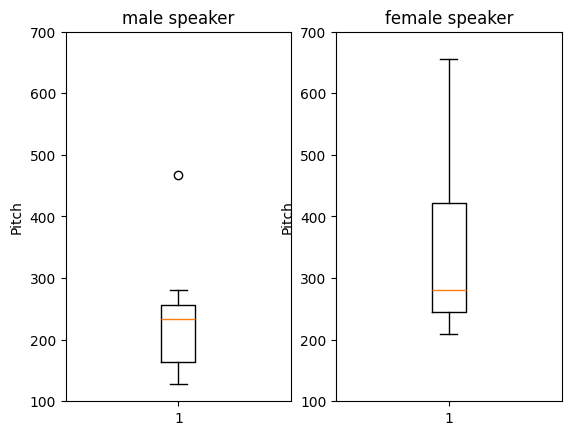

In [25]:
# make a plot of freq of male speakers and female speakers
plt.figure()

plt.subplot(1,2,1)
plt.title('male speaker')
plt.ylabel('Pitch')
plt.ylim(100,700)
plt.boxplot(df.most_common_freq[df.vocal_gender==0])

plt.subplot(1,2,2)
plt.title('female speaker')
plt.ylabel('Pitch')
plt.ylim(100,700)
plt.boxplot(df.most_common_freq[df.vocal_gender==1])

plt.show()

In [33]:
# make a plot of freq of happy speakers and sad speakers
plt.figure()

plt.subplot(1,2,1)
plt.title('Happy')
plt.ylabel('Pitch')
plt.ylim(100,700)
plt.boxplot(df.most_common_freq[df.vocal_emotion==0])

plt.subplot(1,2,2)
plt.title('Sad')
plt.ylabel('Pitch')
plt.ylim(100,700)
plt.boxplot(df.most_common_freq[df.vocal_emotion==1])

plt.show()

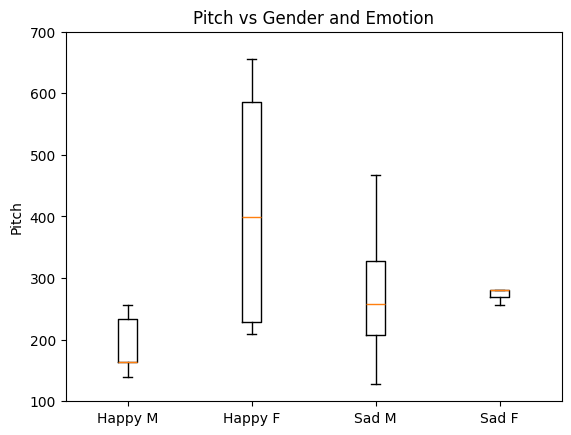

In [27]:
# make a plot with all four separated

plt.figure()

plt.title('Pitch vs Gender and Emotion')
plt.ylabel('Pitch')
plt.ylim(100,700)

plt.boxplot(df.most_common_freq[(df.vocal_emotion==0) & (df.vocal_gender==0)], positions=[1]) # happy and male
plt.boxplot(df.most_common_freq[(df.vocal_emotion==0) & (df.vocal_gender==1)], positions=[2]) # happy and female
plt.boxplot(df.most_common_freq[(df.vocal_emotion==1) & (df.vocal_gender==0)], positions=[3]) # sad and male
plt.boxplot(df.most_common_freq[(df.vocal_emotion==1) & (df.vocal_gender==1)], positions=[4]) # happy and female

plt.xticks([1,2,3,4], ["Happy M", "Happy F", "Sad M", "Sad F"])

plt.show()

## Conclusions

- TODO: repeat your main findings and why they matter
- TODO: state the answer to your question
- TODO: state any limitations or problems with the current results
- TODO: overall, state how your result informs or helps others

## Reference

- TODO: cite one scholarly article that relates to your topic/methods/results

## Appendix 1

- This section documents your technical knowledge that is not part of your research story
- TODO: describe the key features of your data, the type, the dimensions, and how you know the type and dimension
- TODO: document the pre written python libraries that were used.
- TODO: describe the key technical elements in your data visualizations, such as
  the type of plots, settings for the axes, symbol choices, color choices, legend usage, etc.

## Appendix 2

- TODO: explain logical filtering using an example from this course
- TODO: explain standard deviation using an example from this course

## New Data generated from original Data